<a href="https://colab.research.google.com/github/archanadby05/Neural_Network_from_Scratch/blob/master/basic-neural-networks/gradient_descent_sigmoid_neuron_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Descent for Sigmoid Neuron

### **01. Setup and Sigmoid Function**

We begin by importing required libraries and defining the sigmoid and its derivative for gradient calculations.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    s = sigmoid(x)
    return s * (1 - s)

*Explanation:*

The sigmoid function outputs values between 0 and 1. Its derivative is essential for computing gradients during training.

### **02. Create SigmoidNeuron Class**

This class handles forward pass, loss computation, and gradient updates using gradient descent.

In [2]:
class SigmoidNeuron:
    def __init__(self, input_dim, learning_rate=0.1):
        self.weights = np.zeros(input_dim)
        self.bias = 0
        self.lr = learning_rate

    def forward(self, x):
        self.z = np.dot(x, self.weights) + self.bias
        self.a = sigmoid(self.z)
        return self.a

    def compute_loss(self, y_true, y_pred):
        return np.mean((y_true - y_pred) ** 2)

    def train(self, X, y, epochs=1000):
        losses = []
        for epoch in range(epochs):
            total_loss = 0
            for xi, yi in zip(X, y):
                output = self.forward(xi)
                loss = self.compute_loss(yi, output)
                total_loss += loss

                dL_da = -2 * (yi - output)
                da_dz = sigmoid_derivative(self.z)
                dz_dw = xi
                dz_db = 1

                dL_dw = dL_da * da_dz * dz_dw
                dL_db = dL_da * da_dz * dz_db

                self.weights -= self.lr * dL_dw
                self.bias -= self.lr * dL_db
            losses.append(total_loss / len(X))
        return losses

*Explanation:*

The train() function uses manual gradient computation to update weights and bias. We store loss for each epoch to track training progress.

### **03. Train on a Simple Dataset**

Train the neuron on a small linearly-separable dataset.

In [4]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 1])                       # OR gate behavior

neuron = SigmoidNeuron(input_dim=2, learning_rate=0.1)
losses = neuron.train(X, y, epochs=1000)

# Final predictions
for xi in X:
    print(f"Input: {xi}, Output: {neuron.forward(xi):.4f}")

Input: [0 0], Output: 0.1376
Input: [0 1], Output: 0.9163
Input: [1 0], Output: 0.9162
Input: [1 1], Output: 0.9987


*Explanation:*

We use OR gate data to demonstrate how the neuron learns using sigmoid activation and gradient descent.

### **04. Plot Loss Curve**

Visualize the loss over time to confirm learning.

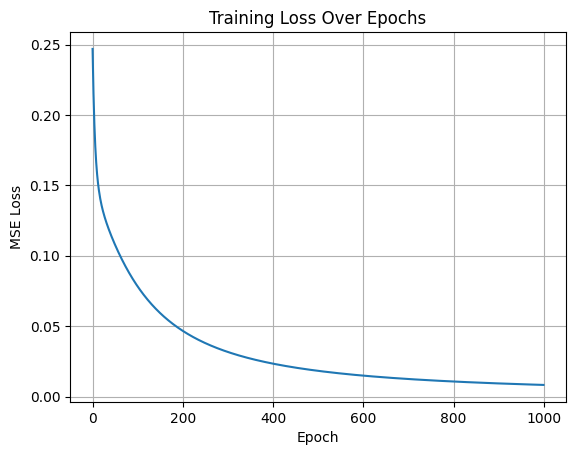

In [5]:
plt.plot(losses)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()

*Explanation:*

The loss curve helps verify that the model is converging during training.